In [2]:
import numpy as np
import scipy.linalg as spl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# book titles
titles = [ "The Neatest Little Guide to Stock Market Investing", 
"Investing For Dummies, 4th Edition", 
"The Little Book of Common Sense Investing: The Only Way to Guarantee Your Fair Share of Stock Market Returns", 
"The Little Book of Value Investing", 
"Value Investing: From Graham to Buffett and Beyond", 
"Rich Dad's Guide to Investing: What the Rich Invest in, That the Poor and the Middle Class Do Not!", 
"Investing in Real Estate, 5th Edition", 
"Stock Investing For Dummies", 
"Rich Dad's Advisors: The ABC's of Real Estate Investing: The Secrets of Finding Hidden Profits Most Investors Miss" 
]
# words to be excluded
stopwords = ["and","edition","for","in","little","of","the","to"] 
# characters to be excluded
ignorechars = """,:'!"""

In [4]:
class LSA(object):
    def __init__(self, stopwords, ignorechars):
        # load in stop words/ ignored chars, initialized a dictionary and document counter
        self.stopwords = stopwords 
        self.ignorechars = ignorechars 
        self.wdict = {} 
        self.dcount = 0
        
    def parse(self, doc):
        # split title into individual words
        words = doc.split()
        for w in words:
            # removed ignored characters and lowercase everything
            to_remove = w.maketrans("","",ignorechars)
            w = w.lower().translate(to_remove) 
            # skip to next word if this is a stop-word
            if w in self.stopwords: continue
            # if word is already in dict, add this document to its counter
            elif w in self.wdict:
                self.wdict[w].append(self.dcount)
            # if the word is new, add it to the dictionary
            else:
                self.wdict[w] = [self.dcount]
        # iterate to get ready for next document
        self.dcount += 1
                
    def build(self):
        # find words that appear in more than one title
        self.keys = [k for k in self.wdict.keys() if len(self.wdict[k]) > 1] 
        # sort the words
        self.keys.sort() 
        # initialize and then fill array of word-document pairs
        self.A = np.zeros([len(self.keys), self.dcount]) 
        for i, k in enumerate(self.keys):
            for d in self.wdict[k]:
                self.A[i,d] += 1
     
    def TFIDF(self):
        # term frequency - inverse document frequency normalization
        WordsPerDoc = np.sum(self.A, axis=0)
        DocsPerWord = np.sum(np.asarray(self.A > 0, 'i'), axis=1)
        rows, cols = self.A.shape
        for i in range(rows):
            for j in range(cols):
                self.A[i,j] = (self.A[i,j] / WordsPerDoc[j]) * np.log(float(cols) / DocsPerWord[i])
                
    def calc(self):
        # calculate the SVD
        self.U, self.S, self.Vt = spl.svd(self.A)
        return self.U, self.S, self.Vt

    def printA(self):
        # print out word-document the matrix
        print(self.A)
        
    def getA(self):
        # assign the word-document matrix
        return self.A

In [5]:
mylsa = LSA(stopwords, ignorechars) 
for t in titles:
    mylsa.parse(t)
    
mylsa.build() 
mylsa.printA()

[[ 0.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  1.]
 [ 1.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  2.  0.  0.  1.]
 [ 1.  0.  1.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.  0.]]


In [6]:
# compute SVD
U,S,VT = mylsa.calc()
# U = coordinates of each word in 'concept space'
# VT = coordinates of each title in 'concept space'
# S = number of 'concepts' that need to be included

# Note that the 1st dimension should be ignored -- 
# For documents, the first dimension correlates with the length of the document,
# and for words, it correlates with the number of times that word has been used in all documents.

In [19]:
print("U=",-U[:,0:3])
print("S=",np.diag(S[0:3]))
print("VT=",-VT[0:3,:])

U= [[ 0.15283556 -0.26603445  0.04450319]
 [ 0.23746367  0.37826282 -0.08595889]
 [ 0.13026538 -0.17428415  0.06901432]
 [ 0.18440432  0.1939483   0.44568964]
 [ 0.2161232   0.08727248 -0.46011902]
 [ 0.74009654 -0.21114703  0.21075317]
 [ 0.17687585 -0.29791161 -0.28320277]
 [ 0.18440432  0.1939483   0.44568964]
 [ 0.3630785   0.58854128 -0.34119818]
 [ 0.2501936  -0.41557716 -0.28435272]
 [ 0.12293617 -0.14317803  0.23449128]]
S= [[ 3.90941804  0.          0.        ]
 [ 0.          2.60911881  0.        ]
 [ 0.          0.          1.99682784]]
VT= [[ 0.35383506  0.22263209  0.33764656  0.25985153  0.22075733  0.49108087
   0.28364968  0.28662975  0.43726389]
 [-0.32093722 -0.14772466 -0.45634958 -0.23776591 -0.13580258  0.54864149
   0.06774301 -0.3070034   0.43829115]
 [-0.40910955  0.14010597 -0.15639762  0.24526283  0.22297589 -0.50966892
   0.55194165 -0.00229626  0.33802383]]


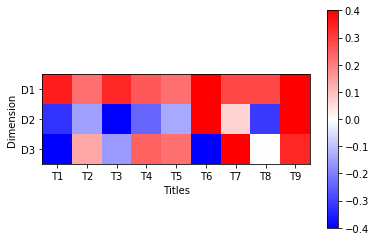

In [20]:
wlist = mylsa.keys
Tlist = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
Dlist = ["D1","D2","D3"]


plt.imshow(-VT[0:3,:],cmap='bwr')
plt.xticks(np.linspace(0,8,9),Tlist)
plt.yticks(np.linspace(0,2,3),Dlist)
plt.xlabel('Titles')
plt.ylabel('Dimension')
plt.clim(-0.4,0.4)
plt.colorbar()

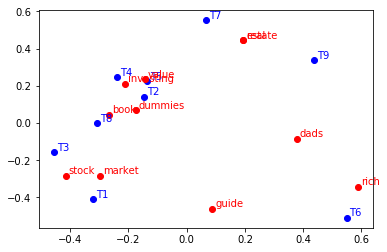

In [24]:
plt.plot(-VT[1,:],-VT[2,:],'bo')
for label, x, y in zip(Tlist,-VT[1,:],-VT[2,:]):
    plt.annotate(label,xy=(x+.01,y+.01),color='blue')
plt.plot(-U[:,1],-U[:,2],'ro')
for label, x, y in zip(wlist,-U[:,1],-U[:,2]):
    plt.annotate(label,xy=(x+.01,y+.01),color='red')